In [1]:
import time
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

## Univariate linear regression from scratch

Regressors are a group of machine learning algorithms which can predict a **continuous value** from a set of **features** for a given **instance**. 

- Continious value - if the value can be any value (rather than a set of values).
- Feature - a property of something (height, count, colour etc).
- Instance - a single example of something being analysed.

A univariate linear regressor predicts a value of something from a single features and assumes the relationship between the feature and the predicted value is linear. It does this by calculating the gradient and the y-intercept of a line of best fit through a scatter plot of the feature and the value of interest. One can then predict an answer for any value of the feature.

In [2]:
def linear_func(X, th0, th1):
    return (X * th1) + th0

def cost_func(X, y, th0, th1):
    mm = len(X)
    return (1/2*mm) * np.sum((linear_func(X, th0, th1) - y)**2)

def pderiv_th0(X, y, alpha, th0, th1):
    mm = len(X)
    return (1 / mm) * np.sum(linear_func(X, th0, th1) - y)

def pderiv_th1(X, y, alpha, th0, th1):
    mm = len(X)
    return (1 / mm) * np.sum((linear_func(X, th0, th1) - y)*X)

The equation for the line of best fit (our model) is simply $$h_{\theta}(x) = \theta_{1}x + \theta_{0}$$
We start with guesses for the $\theta$ parameters and calculate a random line. This obviously will not be a good fit to the data but we need to quantify this so we can improve upon it. To do this we use the cost function which evaluates the quality of the fit $$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x) - y)^{2}$$
If the fit of the model is perfect, $h_{\theta}(x)$ will be the same as $y$ and so $J(\theta)$ (the cost) will be $0$. Any deviation from this perfect fit will increase the cost as the difference between the calculated and actual y value is squared. If we take the partial derivative of the cost function with respect to each parameter at a time.
$$\frac{\partial J}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}$$ 
$$\frac{\partial J}{\partial \theta_{1}} = \frac{1}{m}\sum_{i=1}^{m}((\theta_{1}x + \theta_{0}) - y)^{2}x$$
We find the slope of the cost function for any set of values of the parameters. Our aim is to change the parameters to reduce this slope to 0 (the minima) and in so doing, minimize $J(\theta).

theta_0 -  77
theta_1 -  28


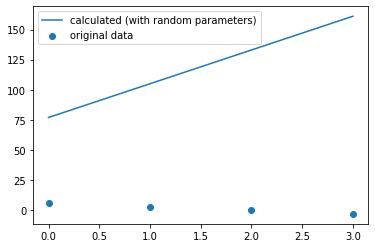

initial cost -  120060.0


In [3]:
# These will be our target values for theta
th0_r = 6
th1_r = -3

# We therefore use our target theta values to calculate y
X = np.array([0,1,2,3])
y = (th1_r*X) + th0_r

# We take random numbers for our two parameters
th0 = np.random.randint(0, 99, 1)[0]#44
th1 = np.random.randint(0, 99, 1)[0]#35
print('theta_0 - ', th0)
print('theta_1 - ', th1)

# And show the resulting plot
plt.plot(X, linear_func(X, th0, th1), label='calculated (with random parameters)')
plt.scatter(X, y, label='original data')
plt.legend()
plt.show()

# The cost is the measure of how inaccurate our line is to our data
print('initial cost - ', cost_func(X, y, th0, th1))

In order to improve on our line parameters, we can take the partial derivative of the cost function and use it to make a new guess for the parameters. 
$$\theta_{0}' = \theta_{0} - \alpha \frac{\partial J}{\partial \theta_{0}}$$
$$\theta_{1}' = \theta_{1} - \alpha \frac{\partial J}{\partial \theta_{1}}$$
The optimization parameter $\alpha$ allows us to control the speed of descent. We then just plug our new values in and repeat the process of optimization untill a satisfactory point is reached. This could be when the partial derivative is 0, when the cost function cannot be reduced significantly further or due to time restraints. We pick the number of loops to get us to this end point.

theta0 -  8.26154274181503
theta1 -  -4.059249959539122
final cost -  14.839960548066049


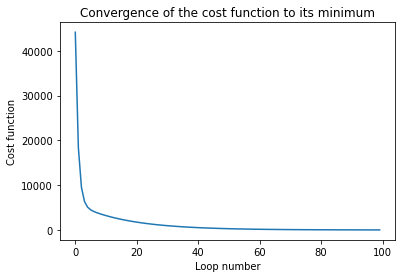

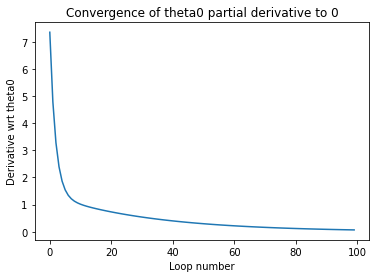

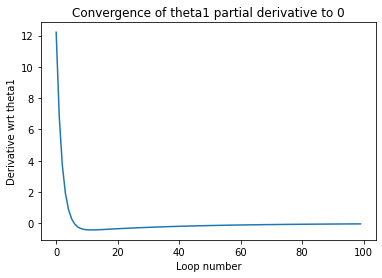

In [4]:
# The parameters for our gradient descent (optimising our line of best fit)
alpha = 0.1
loops = 100

cost_converge = []
part_deriv_0 = []
part_deriv_1 = []

for ii in range(loops):
    # The new values of th0 and th1 are stored in temporary variables so that 
    # each can be calculated with the same original th0 and th1
    temp_th0 = th0 - (alpha * pderiv_th0(X, y, alpha, th0, th1))
    temp_th1 = th1 - (alpha * pderiv_th1(X, y, alpha, th0, th1))
    th0 = temp_th0
    th1 = temp_th1
    cost_converge.append(cost_func(X, y, th0, th1))
    part_deriv_0.append(alpha * pderiv_th0(X, y, alpha, th0, th1))
    part_deriv_1.append(alpha * pderiv_th1(X, y, alpha, th0, th1))

# Our new improved theta values and the subsequent cost using these values
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))


plt.plot(cost_converge)
plt.title('Convergence of the cost function to its minimum')
plt.xlabel('Loop number')
plt.ylabel('Cost function')
plt.show()
plt.plot(part_deriv_0)
plt.title('Convergence of theta0 partial derivative to 0')
plt.xlabel('Loop number')
plt.ylabel('Derivative wrt theta0')
plt.show()
plt.plot(part_deriv_1)
plt.title('Convergence of theta1 partial derivative to 0')
plt.xlabel('Loop number')
plt.ylabel('Derivative wrt theta1')
plt.show()

A negative slope of the cost function indicates that the parameter should be increased and vice versa. Therefore we minus the partial derivative from the old value of the parameter. Our final cost is 0 as with this data set we can find a perfect set and the partial derivatives both converge to 0 so we know we have reached a minimum of the cost function.

Pearson R -  (1.0, 0.0)
weight -  -3
calculated weight -  -4.059249959539122
bias -  6
calculated bias -  8.26154274181503


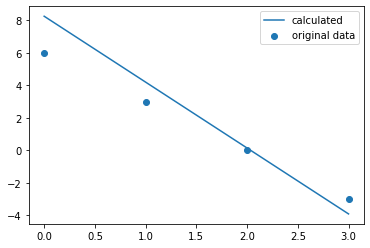

In [5]:
print('Pearson R - ', pearsonr(linear_func(X, th0, th1), y))
print('weight - ', th1_r)
print('calculated weight - ', th1)
print('bias - ', th0_r)
print('calculated bias - ', th0)

plt.plot(X, linear_func(X, th0, th1), label='calculated')
plt.scatter(X, y, label='original data')
plt.legend()
plt.show()

We have accurately determined the target parameters and fit the data. 

## Multivariate linear regression from scratch

We will now try the same with multiple features. This works in essentially the same way, taking each weighting coefficient and updating it from the partial derivative. Again this is all done simultaneously with the bias, and the same parameters are used for each partial derivative.

In [6]:
def linear_func_mv(x, weights):
    return  x @ weights.t()

def cost_func_mv(X, y, weights):
    mm = len(X)
    return (1/2*mm) * torch.sum((linear_func_mv(X, weights) - y)**2)

The linear function for this multivariate liner regression simply has more features and a weighting for each one.
$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + \theta_{n}x_{n}$$
We can calculate this as a simple matrix operation
$$y = X\theta_{n}^{T}$$
where X is our features and $\theta_{i}^{T}$ is the transpose of our weights vector. If $X_{n}^{{i}}$ is a $i x n$ matrix (where $i$ is the number of instances and $n$ is the number of features) and $\theta_{n}^{T}$ is a $n x 1$ matrix we will get a $i x 1$ column vector of our calculated y values. This gives us an answer for each instance.
$$
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{i}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{i,1} & x_{i,2} & \cdots & x_{i,n} \\
\end{bmatrix}
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\vdots \\
\theta_{n}
\end{bmatrix}
$$
The weights vector now includes the bias as a sort of dummy feature which always equals 1. If the bias 'feature' allways is 1, the corresponding weighting is added in every case and so works like a bias. In this way the bias can be optimised with the weights. The cost function is the same but now takes the weight vector as an argument in the calculated y-value.

In [7]:
# The number of features and instances for our dummy data
instances = 50
features = 3

# Creating random values for our target weights
thetai = np.random.randint(1, 9, features+1)
print(thetai)

# Creating the input data randomly
df_inputs = pd.DataFrame()
# The bias 'feature' should all be ones so we add the same bias for each instance
df_inputs['bias'] = [1] * instances
for ii in range(features):
    df_inputs['feat_'+str(ii)] = np.random.randint(1,9,instances)

# creating an empty data series for our taget values
df_targets = pd.DataFrame()
df_targets['target'] = [0] * instances

# Creating the targets from the random weights and feature values so we have a good fit to aim for
feat_bias = df_inputs.columns.tolist()
for ii, col in enumerate(feat_bias):
    df_targets['target'] += (df_inputs[col] * thetai[ii])

# requires .float() to match the weight tensor created below
targets = torch.tensor(df_targets.values).float()
inputs = torch.tensor(df_inputs.values).float()

print(df_inputs.head())
print(df_targets.head())

[8 3 3 6]
   bias  feat_0  feat_1  feat_2
0     1       7       2       3
1     1       6       3       4
2     1       6       2       7
3     1       3       4       1
4     1       3       1       1
   target
0      53
1      59
2      74
3      35
4      26


Here we have created some targets from our input data, weights and bias so that we have something to aim towards in the model.

initial cost -  tensor(4038644.2500, grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 1.7145130634307861 s to complete 10000 loops
final cost -  tensor(1.5943e-06, grad_fn=<MulBackward0>)


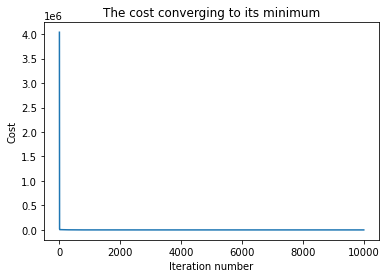

In [8]:
def mv_linear_regression_alg(inputs, targets, loops, alpha):

    # require_grad = True in order to backwards compute derivatives of the weights
    # number of weight coefficients equal to the number of features
    w = torch.randn(1, inputs.shape[1], requires_grad=True)

    print('initial cost - ', cost_func_mv(inputs, targets, w))
    print('Improving parameters...')

    cost_tracker = []

    t_mv1 = time.time()
    for i in range(loops):
        # Calculate the cost each time to analyse the current paramters
        cost = cost_func_mv(inputs, targets, w)
        # Adds the cost to a list to we ca see it change over time
        cost_tracker.append(cost_func_mv(inputs, targets, w).detach().numpy())
        # Calculating the partial derivatives
        cost.backward()
        # stop autograd from tracking history on Tensor
        with torch.no_grad():
            w -= w.grad * alpha
            # Resetting calculated derivatives to 0
            w.grad.zero_()
    t_mv2 = time.time()

    print(f'...time taken is {t_mv2 - t_mv1} s to complete {loops} loops')
    print('final cost - ', cost_func_mv(inputs, targets, w))

    return w, cost_tracker

alpha_mv = 1e-5
loops_mv = 10000
w, costs = mv_linear_regression_alg(inputs, targets, loops_mv, alpha_mv)

plt.plot(costs)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.show()

Here we plot the cost function again to make sure it is trending towards its minimum. If the alpha value is sufficiently small, the cost should get smaller at every step. We also want to check that it has reached a minimum and it isn't still converging. When we see the cost gradient descent we can alter our alpha parameter. In this case the convergence is relatively easy due to high correlations between the features and the target and only a few features. However, it would often be important to adjust alpha to get it as high as possible while still maintaining a consistent decent of the cost. If the alpha value is too small it could take prohibitively long to converge.


RESULTS

Pearson R -  0.9999999999996432
weights -  [8 3 3 6]
calculated weights -  [[7.9998713 3.0000122 3.0000072 6.0000076]]


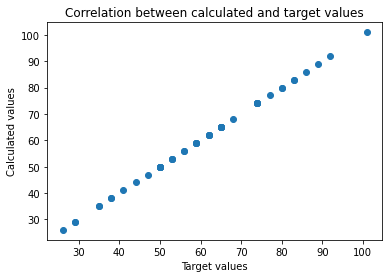

In [10]:
print('\nRESULTS\n')
# We take the tranpose as a column vector in python is a list of lists. It is more convenient to show as a list
calc_targets = linear_func_mv(inputs, w).t()
df_targets['results'] = calc_targets[0].detach().numpy()
print('Pearson R - ', df_targets['target'].corr(df_targets['results']))
print('weights - ', thetai)
# .detach().numpy() gets the values out of the torch tensor and turns them into a numpy array
print('calculated weights - ', w.detach().numpy())

plt.scatter(df_targets['target'].values, df_targets['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()

When plotting the calculated values against the target ones, if they all match we should get a diagonal line of data points (at y=1x+0). We can see that we have achieved this by matching the randomly generated weights.

## Normal equation approach

Yet to be completed